# Librerias

In [388]:
# Carga de librerías
import numpy as np
import tensorflow as tf
import PIL
import PIL.Image
import pathlib
import scipy as sp
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import os
import pathlib
from pathlib import Path


In [389]:
from numpy.linalg import LinAlgError
from scipy.sparse.csgraph import laplacian
# from spectral_metric.lib import find_samples, compute_expectation_with_monter_carlo 
from spectral_metric.estimator import CumulativeGradientEstimator
from spectral_metric.visualize import make_graph

# DATASET DESDE DIRECTORIO 

In [390]:

directorio_dataset = ('../Datasets/Perros y Gatos')
directorio_dataset = pathlib.Path(directorio_dataset)

# Lectura de la carpeta train
directorio_train = ('../Datasets/Perros y Gatos/train')
directorio_train = pathlib.Path(directorio_train)

# Lectura de la carpeta test
directorio_test = ('../Datasets/Perros y Gatos/test')
directorio_test = pathlib.Path(directorio_test)


total_dataset = len(list(directorio_dataset.glob('*/*/*.jpg')))  # Cuenta la cantidad de imagenes del dataset (Aqui busca en las subcarpetas del directorio del dataset)
total_train = len(list(directorio_train.glob('*/*.jpg')))  # Cuenta la cantidad de imagenes de train
total_test = len(list(directorio_test.glob('*/*.jpg')))  # Cuenta la cantidad de imagenes de test

print(f"Total imagenes dataset: {total_dataset}")
print(f"Total imagenes train: {total_train}")
print(f"Total imagenes test: {total_test}")

Total imagenes dataset: 697
Total imagenes train: 557
Total imagenes test: 140


In [391]:
# Definir el batchsize del dataset completo
batch_size_total = total_dataset

In [392]:
# Dimensiones de imagen y tamaño de batch en train
img_height = 32
img_width = 32
#batch_size = 32
batch_size_train = total_train

In [393]:

import tensorflow as tf
import pathlib

# Data splitting (entrenamiento y validación)
train_images = tf.keras.preprocessing.image_dataset_from_directory(
  directorio_train,
  #validation_split=0.2,
  color_mode='rgb',
  label_mode='int',
  #subset="training",
  #seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size_train)

Found 557 files belonging to 2 classes.


In [394]:
# Dimensiones de imagen y tamaño de batch en test
img_height = 32
img_width = 32
#batch_size = 32
batch_size_test = total_test

In [395]:
# Data splitting (entrenamiento y validación)
test_images = tf.keras.preprocessing.image_dataset_from_directory(
  directorio_test,
  #validation_split=0.2,
  color_mode='rgb',
  label_mode='int',
  #subset="training",
  #seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size_test)

Found 140 files belonging to 2 classes.


In [396]:

class_counts_total = {p.name: len(list(p.glob('*.jpg'))) for p in directorio_dataset.glob('*/*')}
class_counts_train = {p.name: len(list(p.glob('*.jpg'))) for p in directorio_train.glob('*')}
class_counts_test = {p.name: len(list(p.glob('*.jpg'))) for p in directorio_test.glob('*')}


# Mostrar el total de imágenes por clase en train
print("\nTotal de imágenes por clase en train:")
for class_name, count in class_counts_train.items():
    print(f"Clase: {class_name}, Número de imágenes: {count}")
print(f"Total imagenes train: {total_train}")

# Mostrar el total de imágenes por clase en test
print("\nTotal de imágenes por clase en test:")
for class_name, count in class_counts_test.items():
    print(f"Clase: {class_name}, Número de imágenes: {count}")
print(f"Total imagenes test: {total_test}")


Total de imágenes por clase en train:
Clase: cats_train, Número de imágenes: 279
Clase: dogs_train, Número de imágenes: 278
Total imagenes train: 557

Total de imágenes por clase en test:
Clase: cats_test, Número de imágenes: 70
Clase: dogs_test, Número de imágenes: 70
Total imagenes test: 140


In [397]:
# Nombres de las clases
class_names_train = list(class_counts_train.keys())
class_names_test = list(class_counts_test.keys())
#class_names_total = sorted(list(set(class_names_train + class_names_test)))
class_names_total = list(class_counts_total.keys())

# Mostrar el número de clases y los nombres
print(f"\nNúmero de clases en train: {len(class_names_train)}")
print(f"Nombres de las clases en train: {class_names_train}")

print(f"\nNúmero de clases en test: {len(class_names_test)}")
print(f"Nombres de las clases en test: {class_names_test}")

print(f"\nNúmero total de clases en el dataset: {len(class_names_total)}")   # Este valor cambio si el nombre de las clases es diferente
print(f"Nombres de todas las clases en el dataset: {class_names_total}")     # Este valor tambien cambia si el nombre de las clases es diferente


Número de clases en train: 2
Nombres de las clases en train: ['cats_train', 'dogs_train']

Número de clases en test: 2
Nombres de las clases en test: ['cats_test', 'dogs_test']

Número total de clases en el dataset: 4
Nombres de todas las clases en el dataset: ['cats_test', 'dogs_test', 'cats_train', 'dogs_train']


In [398]:
for images, labels0 in train_images.take(1):  # only take first element of dataset
    numpy_all_images = images.numpy()  # convertir el tensor de imágenes en un arreglo de numpy y ahora contiene las imágenes del conjunto de datos en formato de numpy.
    numpy_all_labels = labels0.numpy()  # convierte el tensor de etiquetas en un arreglo de numpy y ahora contiene las etiquetas del conjunto de datos en formato de numpy

numpy_all_images /= 255.0  # Scale the features to the [0, 1] range
print(numpy_all_images.shape)

(557, 32, 32, 3)


# CSG

c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\spectral_metric\visualize.py:48: RuntimeWarning: divide by zero encountered in divide
  similarities = difference.max() / difference * 100
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\spectral_metric\visualize.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


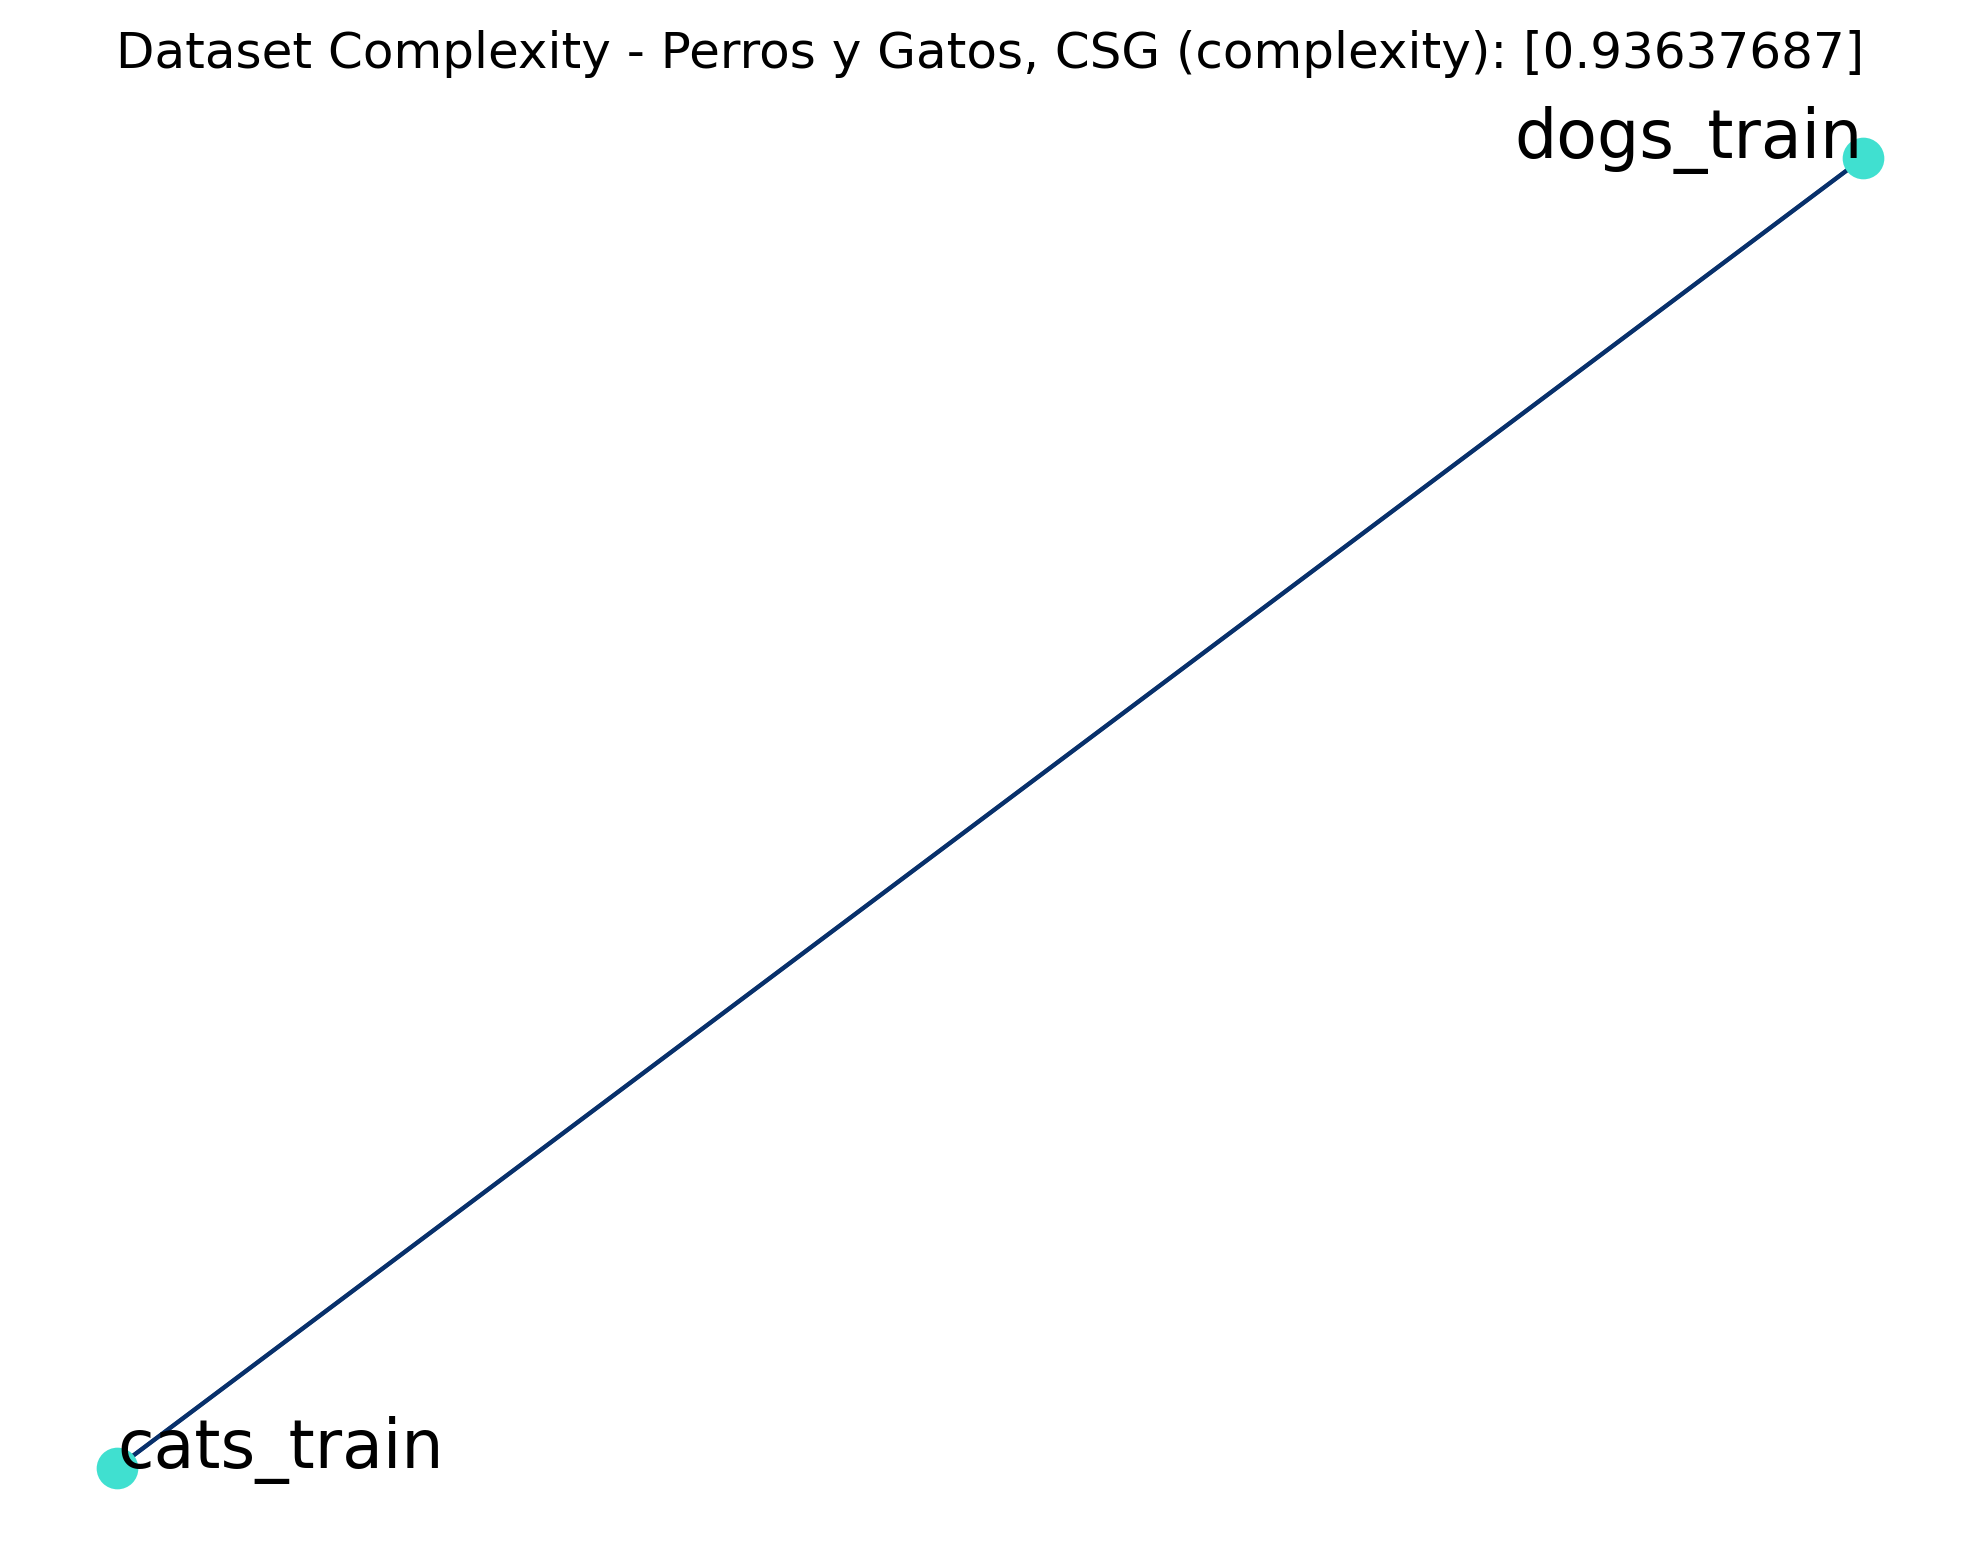

In [399]:
# CIFAR-10 Two classes
fully_dataset_train = numpy_all_images.reshape((numpy_all_images.shape[0], numpy_all_images.shape[1]*numpy_all_images.shape[2]*numpy_all_images.shape[3])) # es un arreglo bidimensional donde cada fila representa una imagen y cada columna representa un píxel de la imagen
fully_labels_train = numpy_all_labels.reshape(numpy_all_labels.shape[0],)

estimator = CumulativeGradientEstimator(M_sample=557, k_nearest=10)
estimator.fit(data=fully_dataset_train, target=fully_labels_train)
csg = estimator.csg  # The actual complexity values.
estimator.evals, estimator.evecs  # The eigenvalues and vectors.

make_graph(estimator.difference, title="Dataset Complexity - Perros y Gatos, CSG (complexity): "+str(csg), classes=class_names_train)

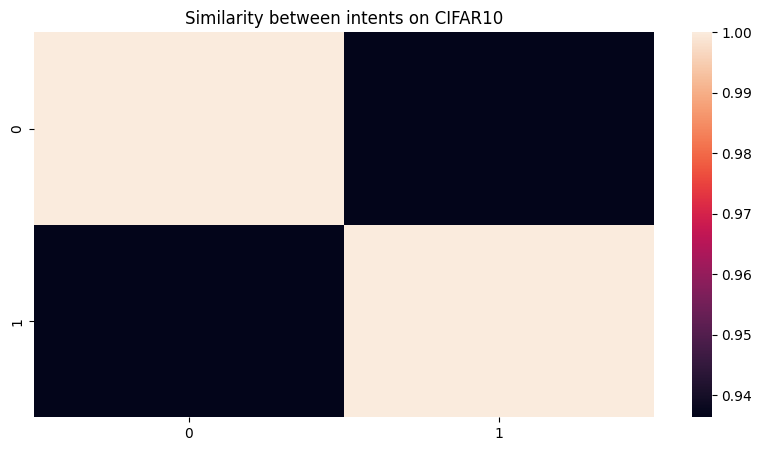

In [400]:
plt.figure(figsize=(10,5))
sns.heatmap(estimator.W)
plt.title("Similarity between intents on CIFAR10")
plt.show()

In [401]:

from scipy.stats import entropy
import pandas as pd

# Calcular la entropía por clase  
entropy_per_class = entropy(estimator.W / estimator.W.sum(-1)[:, None], axis=-1)  

# Encontrar la clase menos confusa (menor entropía)  
least_confused_class_index = np.argmin(entropy_per_class)  
least_confused_class_name = class_names_train[least_confused_class_index]  

print("Class that is the least confused (lowest entropy):", least_confused_class_name)


Class that is the least confused (lowest entropy): cats_train


Comparar clases con la matriz W

In [402]:
pairs = list(zip(*np.unravel_index(np.argsort(estimator.W, axis=None), estimator.W.shape)))[::-1]
pairs = [(i,j) for i,j in pairs if i != j]
print("Most similar pairs")
lst = []
for idx, (i,j) in enumerate(pairs[::2][:10]):
    lst.append({"Intent pair" : f"{class_names_train[i]} <> {class_names_train[j]}", "Similarity": estimator.W[i,j]})
print(pd.DataFrame(lst))

Most similar pairs
                Intent pair  Similarity
0  dogs_train <> cats_train    0.936377


Obtener los nombres de las imagenes

In [403]:
# Obtener todos los nombres de archivo en el dataset
filenames = [str(f) for f in directorio_dataset.glob('*/*/*.jpg')]

# Crear un mapeo de índices a rutas completas de archivo  
filenames_dict = {i: str(f) for i, f in enumerate(directorio_dataset.glob('*/*/*.jpg'))} 

Comparar las muestras con la matriz W

In [404]:
# Muestras menos similares con la matriz W

def show_least_similar(source_intent, target_intent, estimator, class_names, filenames_dict):
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")
    
    # Obtener las probabilidades de la clase objetivo
    probabilities = [sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()]
    
    # Ordenar en orden ascendente (De menos similar a mas similar)
    least_similar = np.argsort(probabilities)[:10]
    dataset_indices = estimator.class_indices[source_intent][least_similar]
    print(dataset_indices.shape)

    # Verificar que los índices estén dentro de los límites del dataset
    valid_indices = [int(di) for di in dataset_indices if int(di) < len(filenames_dict)]
    
    for di in valid_indices:
        try:
            filename_route = filenames_dict[int(di)]  # Directorio en donde estan las imagenes 
            filename = Path(filename_route).name  # Extraer solo el nombre del archivo sin su ruta
            value = probabilities[least_similar[np.where(dataset_indices == di)[0][0]]]  
            print(f"\tNombre del archivo: {filename}, Clase: {class_names[source_intent]}, Similitud: {value:.4f}")
        except IndexError:
            print(f"\tIndexError: Index {int(di)} is out of bounds for the dataset.")

# Suponiendo que `pairs` contiene los índices de las clases en el formato [(0, 1)]
pairs = [(0, 1)]

first_pair = pairs[0]    
show_least_similar(first_pair[0], first_pair[1], estimator, class_names_train, filenames_dict)
show_least_similar(first_pair[1], first_pair[0], estimator, class_names_train, filenames_dict)
# for class_name, indices in estimator.class_indices.items():
#     print(f"Clase: {class_names}, Número de muestras: {len(indices)}")


cats_train <> dogs_train
(10,)
	Nombre del archivo: cat_350.jpg, Clase: cats_train, Similitud: 0.0000
	Nombre del archivo: cat_574.jpg, Clase: cats_train, Similitud: 0.0000
	Nombre del archivo: dog_442.jpg, Clase: cats_train, Similitud: 0.0000
	Nombre del archivo: cat_151.jpg, Clase: cats_train, Similitud: 0.0000
	Nombre del archivo: cat_333.jpg, Clase: cats_train, Similitud: 0.0000
	Nombre del archivo: dog_43.jpg, Clase: cats_train, Similitud: 0.0000
	Nombre del archivo: cat_94.jpg, Clase: cats_train, Similitud: 0.0000
	Nombre del archivo: cat_224.jpg, Clase: cats_train, Similitud: 0.0000
	Nombre del archivo: cat_146.jpg, Clase: cats_train, Similitud: 0.0000
	Nombre del archivo: cat_230.jpg, Clase: cats_train, Similitud: 0.0000
dogs_train <> cats_train
(10,)
	Nombre del archivo: dog_350.jpg, Clase: dogs_train, Similitud: 0.0000
	Nombre del archivo: dog_35.jpg, Clase: dogs_train, Similitud: 0.0000
	Nombre del archivo: cat_402.jpg, Clase: dogs_train, Similitud: 0.0000
	Nombre del archiv

cats_train <> dogs_train
Image shape = (3072,)


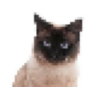

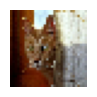

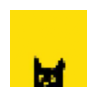

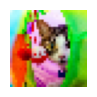

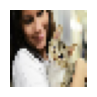

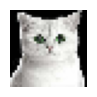

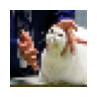

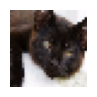

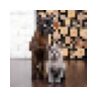

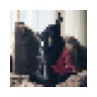

dogs_train <> cats_train
Image shape = (3072,)


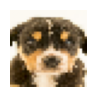

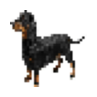

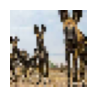

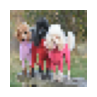

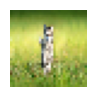

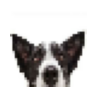

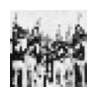

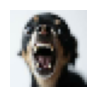

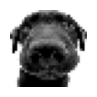

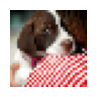

In [405]:
def show_least_similar(source_intent, target_intent, estimator, class_names):
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")
    closest_to_second = np.argsort([sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()])[:10]
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]
    
    # Verifica la forma de la primera imagen y guárdala para impresión
    if len(dataset_indices) > 0:
        first_image = fully_dataset_train[int(dataset_indices[0])]
        print(f"Image shape = {first_image.shape}")

    for di in dataset_indices:
        image = fully_dataset_train[int(di)]
        
        # Convertir el vector 1D a una imagen 3D para que matplotlib pueda graficarlo
        if image.shape == (3072,):  # Asegurarse que la forma sea 3072
            image = image.reshape((32, 32, 3))  # Cambiar según el formato correcto de la imagen
        
        plt.figure(figsize=(1, 1))
        plt.imshow(image, cmap=plt.get_cmap('gray'))
        plt.axis('off')  # Para ocultar los ejes
        plt.show()

first_pair = pairs[0]
show_least_similar(first_pair[0], first_pair[1], estimator, class_names_train)
show_least_similar(first_pair[1], first_pair[0], estimator, class_names_train)



cats_train <> dogs_train
(10,)
	Nombre del archivo: cat_350.jpg, Clase: cats_train, Similitud: 0.0000


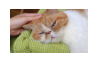

	Nombre del archivo: cat_574.jpg, Clase: cats_train, Similitud: 0.0000


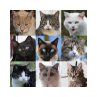

	Nombre del archivo: dog_442.jpg, Clase: cats_train, Similitud: 0.0000


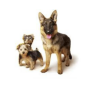

	Nombre del archivo: cat_151.jpg, Clase: cats_train, Similitud: 0.0000


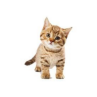

	Nombre del archivo: cat_333.jpg, Clase: cats_train, Similitud: 0.0000


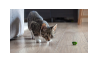

	Nombre del archivo: dog_43.jpg, Clase: cats_train, Similitud: 0.0000


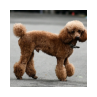

	Nombre del archivo: cat_94.jpg, Clase: cats_train, Similitud: 0.0000


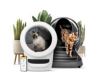

	Nombre del archivo: cat_224.jpg, Clase: cats_train, Similitud: 0.0000


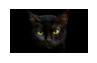

	Nombre del archivo: cat_146.jpg, Clase: cats_train, Similitud: 0.0000


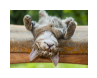

	Nombre del archivo: cat_230.jpg, Clase: cats_train, Similitud: 0.0000


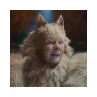

dogs_train <> cats_train
(10,)
	Nombre del archivo: dog_350.jpg, Clase: dogs_train, Similitud: 0.0000


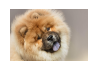

	Nombre del archivo: dog_35.jpg, Clase: dogs_train, Similitud: 0.0000


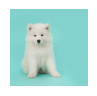

	Nombre del archivo: cat_402.jpg, Clase: dogs_train, Similitud: 0.0000


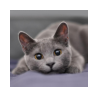

	Nombre del archivo: cat_548.jpg, Clase: dogs_train, Similitud: 0.0000


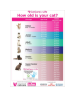

	Nombre del archivo: dog_205.jpg, Clase: dogs_train, Similitud: 0.0000


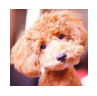

	Nombre del archivo: dog_21.jpg, Clase: dogs_train, Similitud: 0.0000


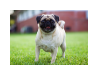

	Nombre del archivo: dog_128.jpg, Clase: dogs_train, Similitud: 0.0000


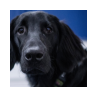

	Nombre del archivo: dog_251.jpg, Clase: dogs_train, Similitud: 0.0000


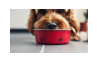

	Nombre del archivo: cat_483.jpg, Clase: dogs_train, Similitud: 0.0000


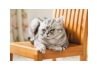

	Nombre del archivo: dog_268.jpg, Clase: dogs_train, Similitud: 0.0000


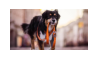

In [406]:
# Muestras mas similares utilizando la matriz W

def show_least_similar(source_intent, target_intent, estimator, class_names_train, filenames_dict):  
    print(f"{class_names_train[source_intent]} <> {class_names_train[target_intent]}")  
    
    # Obtener las probabilidades de la clase objetivo  
    probabilities = [sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()]  
    
    # Ordenar en orden ascendente (De menos similar a mas similar)  
    closest_to_second = np.argsort(probabilities)[:10]  
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]  
    print(dataset_indices.shape)  

    # Verificar que los índices estén dentro de los límites del dataset  
    valid_indices = [int(di) for di in dataset_indices if int(di) < len(filenames_dict)]  
    
    for di in valid_indices:  
        try:  
            # filename ahora es la ruta completa
            filename_route = filenames_dict[int(di)]  # Directorio en donde estan las imagenes 
            filename = Path(filename_route).name  # Extraer solo el nombre del archivo sin su ruta
            value = probabilities[closest_to_second[np.where(dataset_indices == di)[0][0]]]  
            print(f"\tNombre del archivo: {filename}, Clase: {class_names_train[source_intent]}, Similitud: {value:.4f}")  
            
            # Cargar y mostrar la imagen  
            img = plt.imread(filename_route)  # filename_route es la ruta completa donde estan las imagenes 
            plt.figure(figsize=(1, 1))  
            plt.imshow(img)  
            plt.axis('off')  
            plt.show()  
            
        except IndexError:  
            print(f"\tIndexError: Index {int(di)} is out of bounds for the dataset.")  
        except FileNotFoundError:  
            print(f"\tFileNotFoundError: No such file: {filename_route}")  

# Suponiendo que `pairs` contiene los índices de las clases en el formato [(0, 1)]  
pairs = [(0, 1)]  

first_pair = pairs[0]  
show_least_similar(first_pair[0], first_pair[1], estimator, class_names_train, filenames_dict)  
show_least_similar(first_pair[1], first_pair[0], estimator, class_names_train, filenames_dict)

Pruebas César

*   Extraer 10 muestras (archivos de imágenes) en orden 1
*   Extraer 10 muestras (archivos de imágenes) en orden -1
*   Entrenar un modelo con el dataset CIFAR10_2clases
*   Realizar predicción sobre las 20 imágenes (Cat/Cat_c)
*   Entrenar un modelo con el dataset CIFAR10
*   Realizar predicción sobre las 20 imágenes (airplane, automobile, bird,  cat, deer, dog, frog, horse, ship, truck)
*   Probar con el dataset Santiago


